In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
# The features
n_data = 10_000
result = {}
result['age'] = np.random.uniform(low=0.0, high=1.0, size=n_data)
result['income'] = np.random.uniform(low=1.0,high=2.0, size=n_data)
result['savings'] = np.random.uniform(low=0.0, high=1.0)
result['credit_amount_perc'] = np.random.uniform(low=0.5,high=5.0, size=n_data)
region = [None]*3
for i in range(len(region)):
    region[i] = np.zeros((n_data,))
_tmp = np.random.randint(low=0, high=len(region), size=n_data)
for i in range(_tmp.shape[0]):
    region[_tmp[i]][i] = 1
for i in range(len(region)):
    result['region_'+str(i)]=region[i]

In [49]:
df = pd.DataFrame(result)

In [24]:
class PDModel:
    @staticmethod
    def create_data(n_data: int, seed: int=None, regime=-1.0):
        if seed is not None:
            np.random.seed(seed)
        result = {}
        result['age'] = np.random.uniform(low=0.0, high=1.0, size=n_data)
        result['income'] = np.random.uniform(low=1.0,high=2.0, size=n_data)
        result['savings'] = np.random.uniform(low=0.0, high=1.0)
        result['credit_amount_perc'] = np.random.uniform(low=0.5,high=5.0, size=n_data)
        
        region = [None]*3
        for i in range(len(region)):
            region[i] = np.zeros((n_data,))
        _tmp = np.random.randint(low=0, high=len(region), size=n_data)
        for i in range(_tmp.shape[0]):
            region[_tmp[i]][i] = 1
        for i in range(len(region)):
            result['region_'+str(i)]=region[i]
        result['regime'] = regime
        df = pd.DataFrame(result)
        default_prob = PDModel.predict(df)
        df['default_prob'] = default_prob
        tmp = np.random.uniform(low=0.0,high=1.0, size=n_data)
        defaulted = np.zeros((n_data,))
        defaulted[tmp<default_prob] = 1.0
        df['defaulted'] = defaulted
        return df
    
    
    @staticmethod
    def predict(df):
        beta0 = [0.5, 1.1, 0.7]
        tmp = (0.5-df['age'])**2*df['credit_amount_perc']
        x0 = -1.0*(0.5 * df['region_0'] + 1.1 * df['region_1'] + 0.7*df['region_2'])*tmp
        x1 = -1.5*df['income']
        x2 = -2.0*df['savings']
        x3 = df['regime']
        
        
        return np.exp(x0+x1+x2+x3)/(1.0+np.exp(x0+x1+x2+x3))

In [25]:
df ={}
for regime in [-1.0,-0.5,0.0]:
    df[str(regime)] = PDModel.create_data(10_000, regime=regime)

-1.0 0.0083
-0.5 0.011
0.0 0.0436


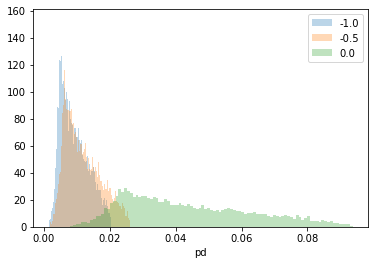

In [31]:
for k,v in df.items():
    prob_d = PDModel.predict(v)
    plt.hist(v['default_prob'],bins=100, label=k, density=True, alpha=0.3)
    print(k, v['defaulted'].sum()/v['defaulted'].shape[0])
plt.xlabel('pd')
plt.legend();

In [32]:
df['-1.0']

,age,income,savings,credit_amount_perc,region_0,region_1,region_2,regime,default_prob,defaulted
0,0.373978,1.221637,0.684498,4.992852,0.0,0.0,1.0,-1.0,0.013967,0.0
1,0.817587,1.631251,0.684498,2.215440,0.0,1.0,0.0,-1.0,0.006295,0.0
2,0.539780,1.443255,0.684498,4.135070,0.0,1.0,0.0,-1.0,0.010549,1.0
3,0.443666,1.818636,0.684498,0.715999,0.0,0.0,1.0,-1.0,0.006069,0.0
4,0.688976,1.419847,0.684498,2.717374,1.0,0.0,0.0,-1.0,0.010485,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.226871,1.256621,0.684498,3.655215,1.0,0.0,0.0,-1.0,0.012246,0.0
9996,0.474292,1.451229,0.684498,2.558013,0.0,0.0,1.0,-1.0,0.010488,0.0
9997,0.991113,1.137607,0.684498,1.809055,0.0,1.0,0.0,-1.0,0.010401,0.0
9998,0.165416,1.197787,0.684498,1.253122,1.0,0.0,0.0,-1.0,0.014262,0.0
